**Importing the needed libraries**

In [1]:
!pip install nltk
!pip install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
from gensim.models import Word2Vec
#nltk.download('all')
import spacy
import string
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from collections import defaultdict
from wordcloud import WordCloud
from numpy import array
import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
plt.style.use(style='seaborn')
%matplotlib inline


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-1-62cf1d9a6eca>:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


# **Dataset describtion**


Connect to the drive and import the dataset "amazon_reviews.csv"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the data set and display its headings and some rows

In [3]:
pd.options.mode.chained_assignment = None
full_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks_NLP/NLP_Project Amazon/amazon_reviews.csv")
full_df.head() #display the first few rows

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


As the first column is unnamed, I will rename it as id

In [4]:
full_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True) # The first column is unnamed so rename it as "id"
full_df.head()                                             # display the dataset again

,id,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


**Data Visualization**

In [5]:
full_df.shape  #check out the dimension of the dataset (no_of_rows, no_of cols)

(4915, 12)

In [6]:
full_df.dtypes #look at the data type for each column

id                        int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [7]:
 # Data summary
full_df.describe()

,id,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


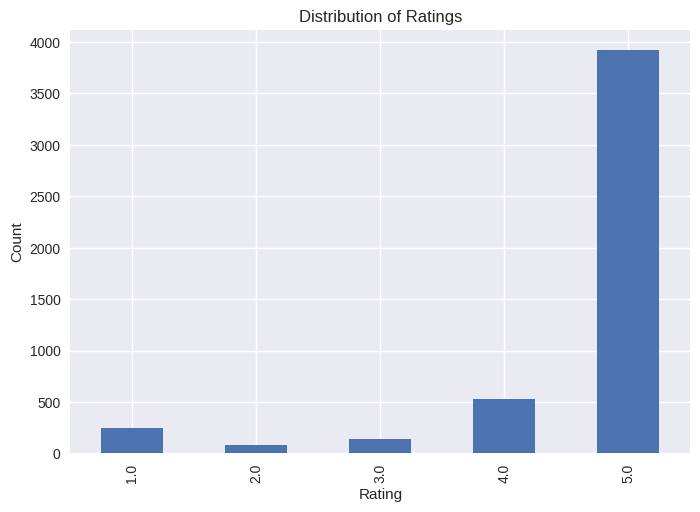

In [8]:
''' generating a bar plot that visualizes the distribution of ratings in the "overall" column
of the full_df DataFrame. Each unique rating value is represented by a bar,
and the height of each bar corresponds to the count of occurrences of that rating.
The plot provides insight into the frequency of different ratings in the dataset.'''

full_df.overall.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()


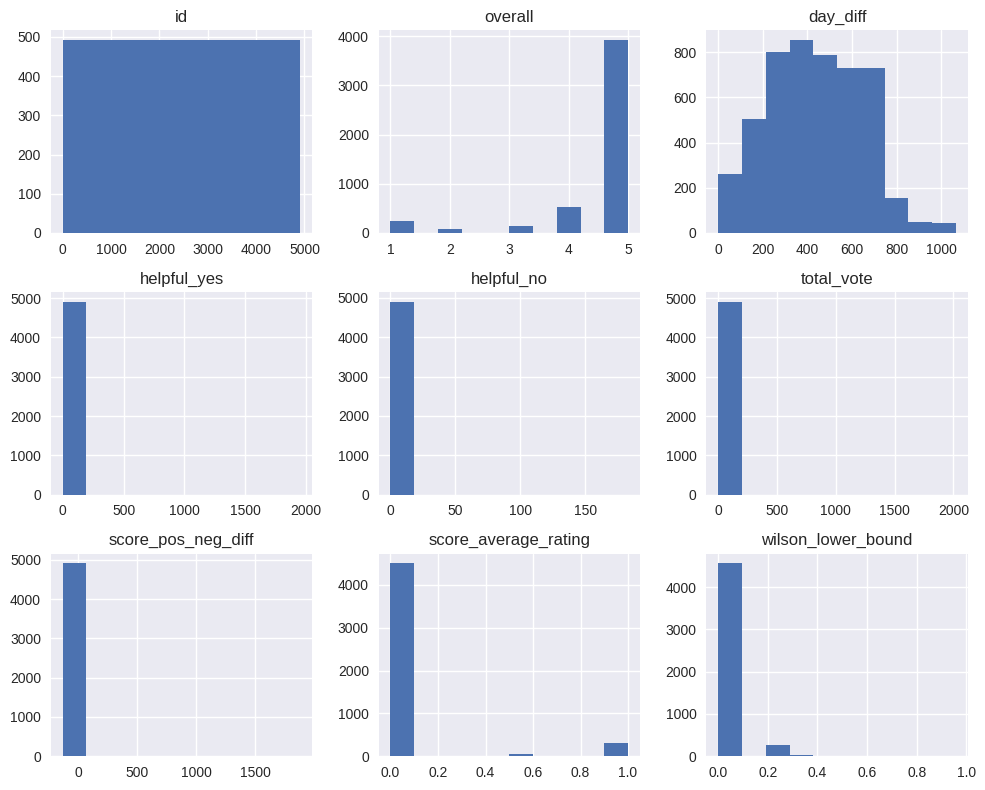

In [9]:
# Plot histograms of numeric variables
#creates histograms for each column in the full_df DataFrame.

full_df.hist(figsize=(10, 8))       #The figsize parameter sets the size of the figure.
plt.tight_layout()                  # ensures that the plot elements are properly arranged.
plt.show()

# **Pre-processing**

In [10]:
full_df.isnull().sum() # checking for null values

id                      0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [11]:
#Dropping rows with null values
full_df = full_df.dropna(axis=0)

In [12]:
#removing duplicates
full_df.drop_duplicates(inplace= True)

In [13]:
df = full_df[["reviewText"]]
df["reviewText"] = df["reviewText"].astype(str) # create a new DataFrame called "df" containing only the "reviews" column
df.head()

,reviewText
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
5,It's mini storage. It doesn't do anything els...


# *Text processing for the reviewsText column *
*   Lower casing
*   Removing punctuation
*   Removing numbers
*   Removing stop words
*   Stemming: the process of reducing inflected (or sometimes derived) words to their word stem, base or root form
*   Lemmatization: the process of reducing words to their base or dictionary form. NLTK provides the WordNetLemmatizer for this purpose
*   Tokenization: the process of splitting text into individual words or tokens.












In [14]:
#### Lower Casing
df["reviewText"] = df["reviewText"].str.lower()

#### Removing punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["reviewText"] = df["reviewText"].apply(lambda text: remove_punctuation(text))

#### Removing numbers
df["reviewText"] = df["reviewText"].str.replace('\d','')

#### Removing stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["reviewText"] = df["reviewText"].apply(lambda text: remove_stopwords(text))

#### Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["reviewText"] = df["reviewText"].apply(lambda text: stem_words(text))

#### Lemmatization: is the process of reducing words to their base or dictionary form. NLTK provides the WordNetLemmatizer for this purpose

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["reviewText"] = df["reviewText"].apply(lambda text: lemmatize_words(text))

df.head()


<ipython-input-14-2ecd94d1a896>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviewText"] = df["reviewText"].str.replace('\d','')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviewText
1,purchas devic work advertis never much phone m...
2,work expect sprung higher capac think made bit...
3,think work greathad diff bran gb card went sou...
4,bought retail packag arriv legit orang envelop...
5,mini storag doesnt anyth el suppos purchas add...


In [15]:
#Tokenization is the process of splitting text into individual words or tokens.
df_token=df['reviewText'].apply(word_tokenize)
df_token

1       [purchas, devic, work, advertis, never, much, ...
2       [work, expect, sprung, higher, capac, think, m...
3       [think, work, greathad, diff, bran, gb, card, ...
4       [bought, retail, packag, arriv, legit, orang, ...
5       [mini, storag, doesnt, anyth, el, suppos, purc...
                              ...                        
4910    [bought, sandisk, gb, class, use, htc, inspir,...
4911    [use, extend, capabl, samsung, galaxi, note, g...
4912    [great, card, fast, reliabl, come, option, ada...
4913    [good, amount, space, stuff, want, fit, gopro,...
4914    [ive, heard, bad, thing, gb, micro, sd, card, ...
Name: reviewText, Length: 4913, dtype: object

**Sentiment Labels**

- Convert labels to positive or negative based on overall ratings
- Based on the overall, the number of Positive & Negative messages are counted and plotted

In [16]:
# Ratings 4 and above are considered positive , and ratings below 4 are considered negative.
full_df["sentiment"] = full_df["overall"].apply(lambda x: "Positive" if x >= 4 else "Negative")

full_df.overall.value_counts()

5.0    3921
4.0     526
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

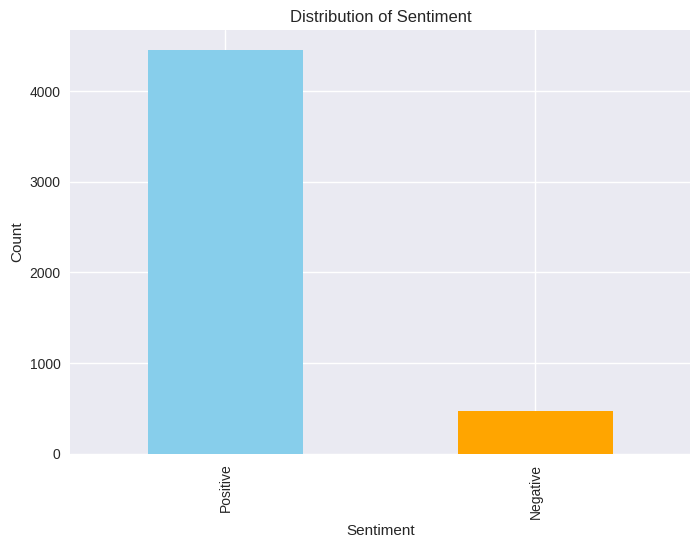

In [17]:
# Visualize based on sentiment labels
full_df["sentiment"].value_counts().plot(kind="bar", color = ["skyblue","orange"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiment")

plt.show()

In [18]:
pos_comments = full_df[full_df.sentiment == 'Positive']


In [19]:
from wordcloud import WordCloud

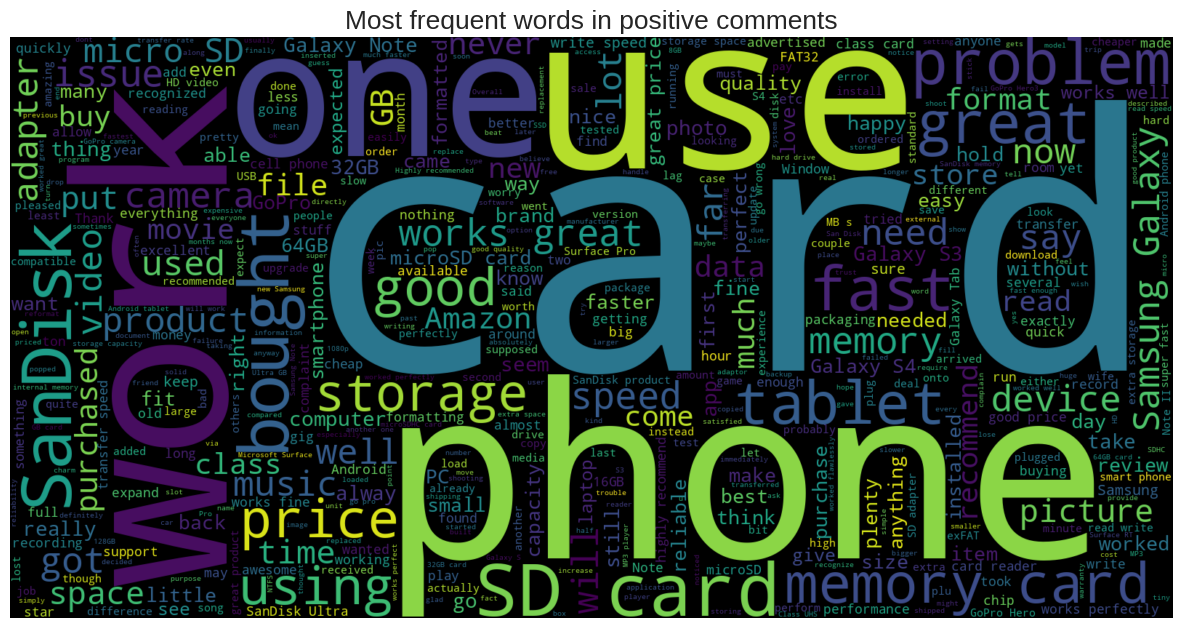

In [20]:
#creating wordCloud for the positive comments
text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [21]:
neg_comments = full_df[full_df.sentiment == 'Negative']


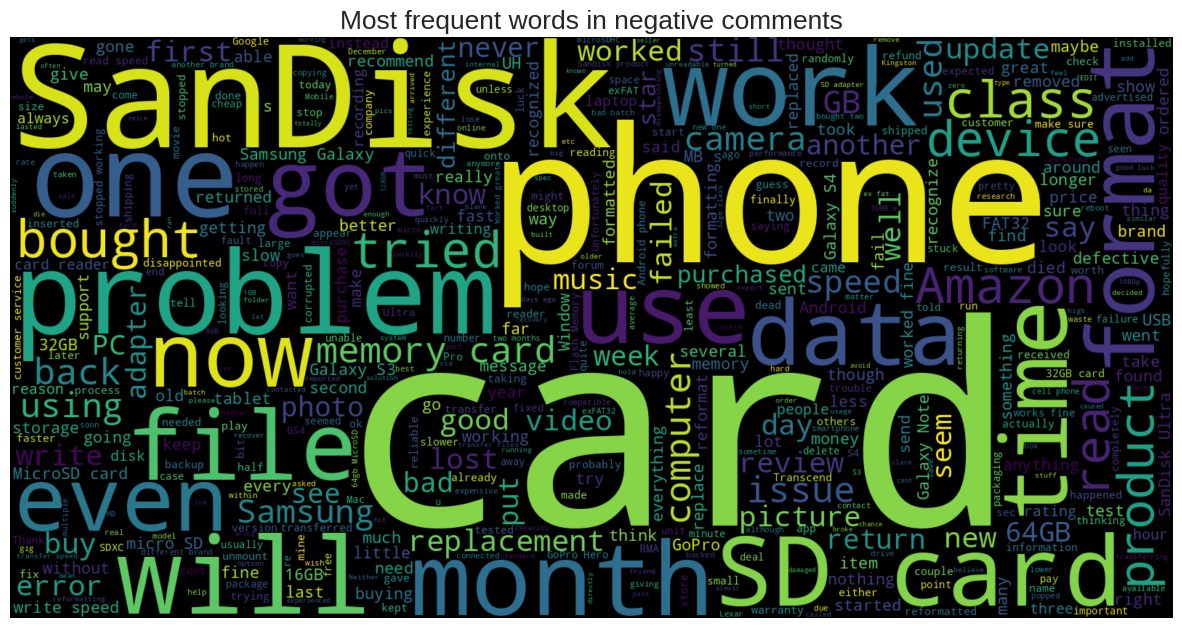

In [22]:
#creating wordCloud for the Negative comments
text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

# **Text Representation**

*   **POS tagging**: is the process of assigning a grammatical label (tag) to each word in a sentence, indicating its part of speech (e.g., noun, verb, adjective).
* **Word Embedding**:word2Vec is a a technique used in natural language processing (NLP) to represent words as dense numerical vectors in a continuous vector space. It is a form of distributed representation that captures the semantic and syntactic meaning of words based on their context within a given corpus.
* **Bag of Words**: Bag of Words technique, which represents text data as a matrix of word counts.


**1- POS tagging**
generating the pos_tags variable, which will contain the POS-tagged text data based on the "reviewText" column of the full_df DataFrame.

In [23]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
# Apply POS tagging to the tokenized "reviewText" column
words = df_token.apply(lambda x: [nltk.word_tokenize(sent) for sent in x])

# Apply POS tagging to each word
pos_tags= words.apply(lambda x: [nltk.pos_tag(sent) for sent in x])


In [25]:
pos_tags

1       [[(purchas, NN)], [(devic, NN)], [(work, NN)],...
2       [[(work, NN)], [(expect, VB)], [(sprung, NN)],...
3       [[(think, NN)], [(work, NN)], [(greathad, NN)]...
4       [[(bought, NN)], [(retail, JJ)], [(packag, NN)...
5       [[(mini, NN)], [(storag, NN)], [(doesnt, NN)],...
                              ...                        
4910    [[(bought, NN)], [(sandisk, NN)], [(gb, NN)], ...
4911    [[(use, NN)], [(extend, NN)], [(capabl, NN)], ...
4912    [[(great, JJ)], [(card, NN)], [(fast, NN)], [(...
4913    [[(good, JJ)], [(amount, NN)], [(space, NN)], ...
4914    [[(ive, JJ)], [(heard, NN)], [(bad, JJ)], [(th...
Name: reviewText, Length: 4913, dtype: object

**2- Word Embedding (Word2Vec)**: models are trained to learn word embeddings by considering the surrounding words in a given context. These embeddings can be used to measure word similarity, perform vector arithmetic, or as input features for various natural language processing (NLP) tasks.

In [26]:
#Word Embeddings: word2Vec

from gensim.models import Word2Vec
# Training the Word2Vec model
model = Word2Vec(df_token, min_count=1)  #using the tokenized dataframe "df_token" that we created /
                                         # previously by tokenizing the "reviewText"

# Finding Word Vectors
vector = model.wv['good']   #this is the model, the embedding for good as learned by the Word2vec model
'''vector is a numerical representation that captures the
    semantic meaning of the word based on its context within the training data .'''
vector

array([-3.73431951e-01,  3.79607260e-01,  4.73926263e-03,  7.16314614e-02,
        4.56739329e-02, -9.48895216e-01,  1.76034629e-01,  1.37308562e+00,
       -4.52039182e-01, -6.00440919e-01, -2.54343867e-01, -6.43634737e-01,
       -7.07431212e-02,  4.90445137e-01,  7.65185580e-02,  1.05023988e-01,
        8.62493962e-02, -7.12304175e-01, -9.24976096e-02, -1.21100235e+00,
       -8.99821073e-02,  3.66372585e-01,  2.57789105e-01, -4.75317776e-01,
       -1.28040969e-01, -1.18691787e-01, -4.74152595e-01,  1.11006387e-01,
       -5.23793936e-01,  4.40459788e-01,  5.61005294e-01,  2.64574140e-01,
        3.84594440e-01, -5.98846316e-01, -7.92234480e-01,  5.21826267e-01,
        6.74826503e-02, -3.92441124e-01, -3.24365169e-01, -8.57395172e-01,
        1.25270709e-01, -5.73895216e-01, -2.80745178e-01, -1.26582198e-03,
        9.37318563e-01, -4.14323866e-01, -2.24115118e-01, -2.86915451e-01,
        2.52944201e-01,  3.56810778e-01,  5.61384022e-01, -4.05293375e-01,
        7.80496076e-02,  

In [27]:
# Most similar words
similar = model.wv.most_similar('great')

similar     #contains list of tuples, where each tuple represents a similar word to "great" and its similarity score.

[('work', 0.9808123111724854),
 ('perfectli', 0.9773986339569092),
 ('expand', 0.9770634174346924),
 ('well', 0.9759288430213928),
 ('wife', 0.9737876057624817),
 ('pro', 0.9732763171195984),
 ('love', 0.9722526669502258),
 ('fine', 0.9715278148651123),
 ('bought', 0.9684444665908813),
 ('far', 0.9662091135978699)]

**3- Bag of Words**

In [28]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with ngram_range and stop_words parameters
CountVec = CountVectorizer(ngram_range=(1, 1),
                          stop_words='english')

# Transform the sentences
Count_data = CountVec.fit_transform(df['reviewText'])

# Create a DataFrame to display the word counts
cv_dataframe = pd.DataFrame(Count_data.toarray(), columns=CountVec.get_feature_names_out())

# Print the DataFrame
print(cv_dataframe)

      aa  aac  aba  abdroid  abil  abl  aboutgood  abouti  aboutthereher  \
0      0    0    0        0     0    0          0       0              0   
1      0    0    0        0     0    0          0       0              0   
2      0    0    0        0     0    0          0       0              0   
3      0    0    0        0     0    0          0       0              0   
4      0    0    0        0     0    0          0       0              0   
...   ..  ...  ...      ...   ...  ...        ...     ...            ...   
4908   0    0    0        0     0    1          0       0              0   
4909   0    0    0        0     0    0          0       0              0   
4910   0    0    0        0     0    0          0       0              0   
4911   0    0    0        0     0    0          0       0              0   
4912   0    0    0        0     0    0          0       0              0   

      aboutto  ...  zip  zippi  zl  zone  zoom  zte  ztpad  zumo  zune  zunehd  
0     

In [29]:
# implementing bag of words using nltk package
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter


In [30]:
vocabulary = set(word for token in df_token for word in token)
# Initialize a BoW dictionary with word counts
bow = {word: 0 for word in vocabulary}

# Count word occurrences
for token in df_token:
    for word in token:
        bow[word] += 1

# Print the BoW representation
print("Bag of Words (BoW) representation:")
print(bow)

Bag of Words (BoW) representation:
{'againspe': 1, 'wellif': 1, 'kayak': 1, 'boxand': 1, 'invis': 1, 'glass': 3, 'leastmi': 1, 'amazonth': 1, 'clicker': 1, 'butthi': 1, 'bloatwar': 3, 'sprung': 1, 'sdsdqugaffpa': 4, 'pena': 1, 'computeroveral': 1, 'ultracheap': 1, 'high': 161, 'desktop': 24, 'desta': 1, 'wrestl': 1, 'instor': 1, 'usp': 7, 'notlat': 1, 'itformat': 1, 'chose': 19, 'thrown': 1, 'whatsoeveri': 1, 'pack': 25, 'would': 692, 'cardinfo': 1, 'voltagesit': 1, 'dude': 6, 'uninterrupt': 1, 'particularli': 7, 'adaptersup': 1, 'sdsdquag': 1, 'whop': 2, 'razrm': 2, 'fue': 2, 'xvid': 1, 'awri': 1, 'shack': 3, 'ole': 2, 'card': 5537, 'cect': 1, 'net': 2, 'failedi': 2, 'inblu': 1, 'scan': 18, 'lta': 1, 'noproblem': 1, 'architectur': 1, 'spesso': 1, 'hc': 17, 'phenomen': 3, 'reviewupd': 1, 'backfre': 1, 'gbt': 1, 'sensewel': 1, 'cardit': 6, 'smartphon': 138, 'altogetherwhen': 1, 'onionsour': 1, 'vh': 1, 'formati': 1, 'deduct': 2, 'death': 3, 'marginsupd': 1, 'share': 14, 'sruyatqmn': 1, 

In [31]:
full_df['sentiment'].value_counts()

Positive    4447
Negative     466
Name: sentiment, dtype: int64

# **N-gram**

**step1: Data Splet**
The train_test_split function splits the data into training and testing sets based on the specified test_size parameter, which determines the proportion of the data that will be allocated for testing. In this case, it is set to 0.30, indicating that 30% of the data will be used for testing, while the remaining 70% will be used for training.

x_train: This is the training set of the feature data. It contains a subset of the original x data that will be used for training the model.
x_test: This is the testing set of the feature data. It contains a subset of the original x data that will be used for evaluating the model's performance.
y_train: This is the training set of the target data. It contains a subset of the original y data that corresponds to the x_train samples.
y_test: This is the testing set of the target data. It contains a subset of the original y data that corresponds to the x_test samples.
By splitting the data into separate training and testing sets, you can train a machine learning model on the training data and evaluate its performance on the unseen testing data.

In [32]:
x=df['reviewText'].values
y=full_df['sentiment'].values


In [33]:
#Train test split
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.30)

x_train.shape  #number of (rows) training set of the feature data

(3439,)

In [34]:
'''creating a training DataFrame (df_train) by combining two separate DataFrames (df1 and df2) containing
   the training data (x_train and y_train, respectively).'''

df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'reviews'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})

# Concatenation of df1 and df2
df_train=pd.concat([df1,df2],axis=1)

# Display the first few rows of the df_train DataFrame.
df_train.head()

,reviews,sentiment
0,sandisk great brand fail purchas sever think b...,Positive
1,dont understand use micro sd card usb alway se...,Positive
2,perfect s galaxi note great price recommend sd...,Positive
3,love card way faster micro sd ever own transfe...,Positive
4,bought go samsung galaxi iii class mean fast w...,Positive


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    3439 non-null   object
 1   sentiment  3439 non-null   object
dtypes: object(2)
memory usage: 53.9+ KB


In [36]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'reviews'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
#Concatenation of df3 and df4
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,reviews,sentiment
0,two phone later still never problem dont think...,Positive
1,fast reliabl plenti size money ran sandisk mem...,Positive
2,card allow camera work hour continu copiesit o...,Positive
3,im hope one behav good least yearil updat some...,Positive
4,gb mirosd great use phone hardli upload pic ph...,Positive


**step 2: Generate N-grams**
the generate_N_grams function takes an input text, removes stopwords, generates N-grams based on the specified ngram value, and returns a list of N-gram strings.I will use **uni-gram**


In [37]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans


In [38]:
from collections import defaultdict

In [39]:
'''defaultdict(int) is used to create two defaultdict objects, positiveValues and negativeValues,
with the default value set to integer 0.'''

positiveValues=defaultdict(int)
negativeValues=defaultdict(int)


In [40]:
#counting the occurrences of words in the "reviews" column of the df_train DataFrame, based on the sentiment labels.

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="Positive"].reviews:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="Negative"].reviews:
  for word in generate_N_grams(text):
    negativeValues[word]+=1


Sentence after removing stopwords: ['sandisk', 'great', 'brand', 'fail', 'purchas', 'sever', 'think', 'bad', 'luck', 'sure', 'amazon', 'replac']
Sentence after removing stopwords: ['dont', 'understand', 'use', 'micro', 'sd', 'card', 'usb', 'alway', 'seem', 'work', 'better', 'last', 'longer']
Sentence after removing stopwords: ['perfect', 'galaxi', 'note', 'great', 'price', 'recommend', 'sd', 'card', 'storag', 'need']
Sentence after removing stopwords: ['love', 'card', 'way', 'faster', 'micro', 'sd', 'ever', 'transfer', 'rom', 'like', 'noth', 'galaxi', 'old', 'microsd', 'come', 'everi', 'droid', 'phone', 'use', 'take', 'everhigh', 'recommend', 'one']
Sentence after removing stopwords: ['bought', 'go', 'samsung', 'galaxi', 'iii', 'class', 'mean', 'fast', 'work', 'well']
Sentence after removing stopwords: ['best', 'memori', 'found', 'consist', 'high', 'speed', 'ideal', 'modern', 'applic', 'especi', 'high', 'definit', 'video', 'record']
Sentence after removing stopwords: ['dont', 'know', '

In [41]:
#stores the count of words associated with positive sentiment.
positiveValues

defaultdict(int,
            {'sandisk': 675,
             'great': 987,
             'brand': 172,
             'fail': 61,
             'purchas': 337,
             'sever': 74,
             'think': 106,
             'bad': 60,
             'luck': 18,
             'sure': 124,
             'amazon': 194,
             'replac': 91,
             'dont': 220,
             'understand': 12,
             'use': 1386,
             'micro': 336,
             'sd': 756,
             'card': 3083,
             'usb': 112,
             'alway': 145,
             'seem': 161,
             'work': 1749,
             'better': 87,
             'last': 55,
             'longer': 31,
             'perfect': 136,
             'galaxi': 631,
             'note': 341,
             'price': 653,
             'recommend': 334,
             'storag': 514,
             'need': 448,
             'love': 154,
             'way': 98,
             'faster': 143,
             'ever': 87,
             'transf

In [42]:
#stores the count of words associated with negative sentiment.
negativeValues

defaultdict(int,
            {'bought': 81,
             'abl': 23,
             'load': 10,
             'music': 45,
             'verizon': 2,
             'lg': 2,
             'android': 28,
             'phone': 253,
             'spent': 5,
             'hour': 20,
             'ad': 6,
             'card': 880,
             'put': 37,
             'read': 84,
             'anyth': 24,
             'memori': 111,
             'gb': 204,
             'work': 235,
             'fine': 45,
             'must': 9,
             'flaw': 2,
             'also': 40,
             'got': 80,
             'stuck': 12,
             'slot': 7,
             'use': 200,
             'util': 7,
             'knife': 1,
             'thin': 1,
             'blade': 1,
             'pull': 7,
             'old': 17,
             'sandisk': 253,
             'sd': 95,
             'still': 53,
             'thought': 25,
             'new': 59,
             'would': 121,
             'reliabl': 15

In [43]:
#a view object that contains a list of tuples, where each tuple represents a key-value pair in the positiveValues defaultdict object.
positiveValues.items()

dict_items([('sandisk', 675), ('great', 987), ('brand', 172), ('fail', 61), ('purchas', 337), ('sever', 74), ('think', 106), ('bad', 60), ('luck', 18), ('sure', 124), ('amazon', 194), ('replac', 91), ('dont', 220), ('understand', 12), ('use', 1386), ('micro', 336), ('sd', 756), ('card', 3083), ('usb', 112), ('alway', 145), ('seem', 161), ('work', 1749), ('better', 87), ('last', 55), ('longer', 31), ('perfect', 136), ('galaxi', 631), ('note', 341), ('price', 653), ('recommend', 334), ('storag', 514), ('need', 448), ('love', 154), ('way', 98), ('faster', 143), ('ever', 87), ('transfer', 318), ('rom', 26), ('like', 323), ('noth', 59), ('old', 101), ('microsd', 244), ('come', 185), ('everi', 62), ('droid', 25), ('phone', 1082), ('take', 212), ('everhigh', 1), ('one', 661), ('bought', 499), ('go', 281), ('samsung', 521), ('iii', 23), ('class', 377), ('mean', 46), ('fast', 598), ('well', 425), ('best', 138), ('memori', 837), ('found', 58), ('consist', 17), ('high', 99), ('speed', 538), ('ide

In [44]:
'''creates two pandas DataFrames, df_positive and df_negative, based on the contents of the
positiveValues and negativeValues defaultdict objects, respectively.'''

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))


**Visualizing the most frequently used words**

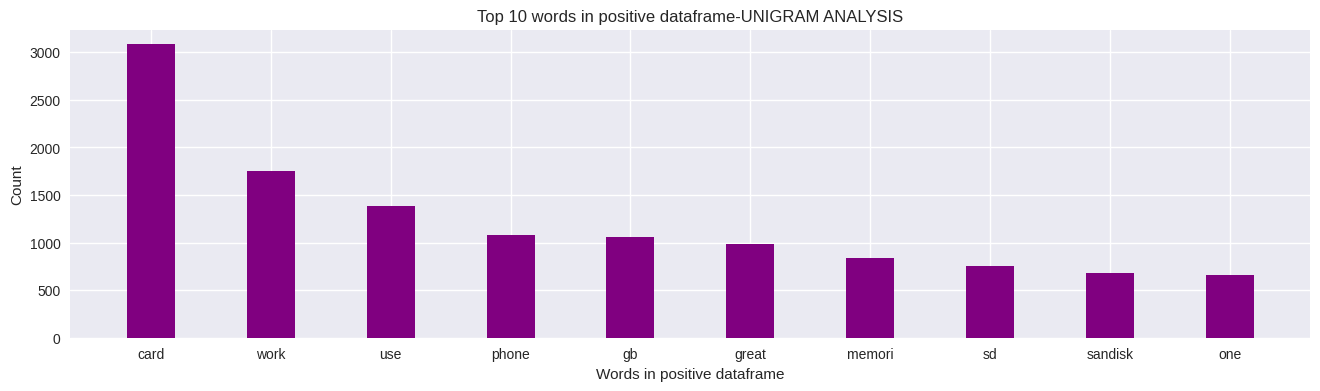

In [45]:
#visualize the top 10 words in the positive sentiment context based on/
#the counts obtained from the df_positive DataFrame.

pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='purple', width = 0.4)

plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()


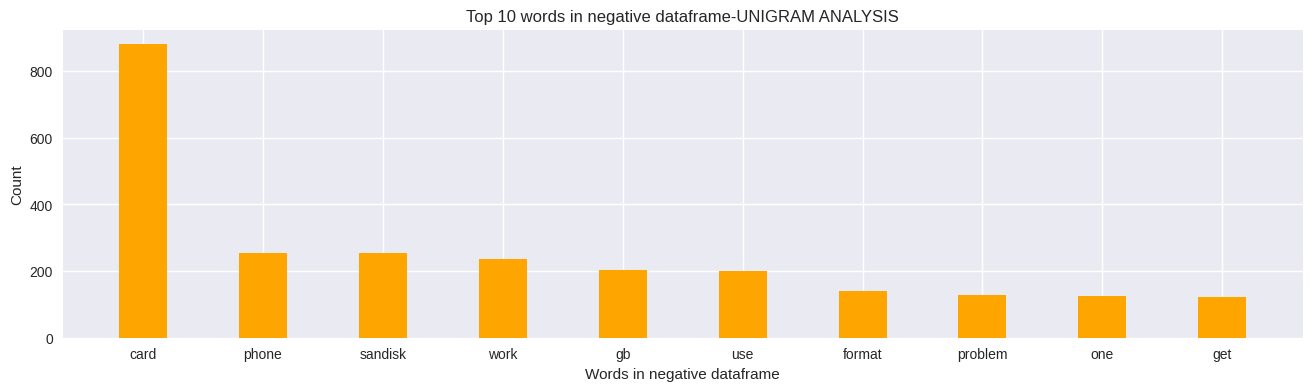

In [46]:
#visualize the top 10 words in the negative sentiment context

plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='orange', width = 0.4)

plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

# **Text Classification**

**1- Text Classifier Using Multinomial Naive Bayes Classifier**

Naive Bayes is a popular and efficient algorithm for text classification tasks. It is based on the probabilistic principles of Bayes' theorem and assumes that the features (words or tokens) are conditionally independent given the class label. Naive Bayes classifiers are known for their simplicity, speed, and ability to handle high-dimensional data efficiently.

In [47]:
full_df['sentiment']

1       Positive
2       Positive
3       Positive
4       Positive
5       Positive
          ...   
4910    Negative
4911    Positive
4912    Positive
4913    Positive
4914    Positive
Name: sentiment, Length: 4913, dtype: object

In [48]:
#x=Count_data
docs=list(df['reviewText'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

full_df['sentiment'] = full_df.sentiment.map({'Positive':1, 'Negative':0})

full_df['sentiment']

1       1
2       1
3       1
4       1
5       1
       ..
4910    0
4911    1
4912    1
4913    1
4914    1
Name: sentiment, Length: 4913, dtype: int64

In [49]:
x=docs
y=full_df['sentiment']

In [50]:
#X=df['reviewText']
#y=full_df['sentiment']

In [51]:
###########################
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.30, random_state=5)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3439, 7429) (3439,)
(1474, 7429) (1474,)


In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:
# Build a Multinomial naive bayes classifier
NB = MultinomialNB()
%time NB.fit(x_train,y_train)
y_pred_train = NB.predict(x_train)
y_pred_test = NB.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 145 ms, sys: 4.92 ms, total: 150 ms
Wall time: 96.5 ms

Training Accuracy score: 0.9072404768828147
Testing Accuracy score: 0.8989145183175034


In [54]:
#Model Evaluation

print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred_test)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred_test, target_names=['Negative', 'Positive'])
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred_test)
print('MNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[   0  147]
 [   2 1325]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       147
    Positive       0.90      1.00      0.95      1327

    accuracy                           0.90      1474
   macro avg       0.45      0.50      0.47      1474
weighted avg       0.81      0.90      0.85      1474

MNB Classifier Accuracy of the model: 89.89%


A **confusion matrix** is a table that visualizes the performance of a classification model by showing the counts of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions.

Based on the results of the Multinomial Naive Bayes (MNB) classifier:



*   The MNB classifier achieved an accuracy of 89.89%.
*  The confusion matrix shows that the MNB classifier correctly predicted 0 instances as negative (true negatives) and 1325 instances as positive (true positives).
*   However, it incorrectly predicted 147 instances as positive when they were actually negative (false positives), and it failed to identify any instances as negative (false negatives).

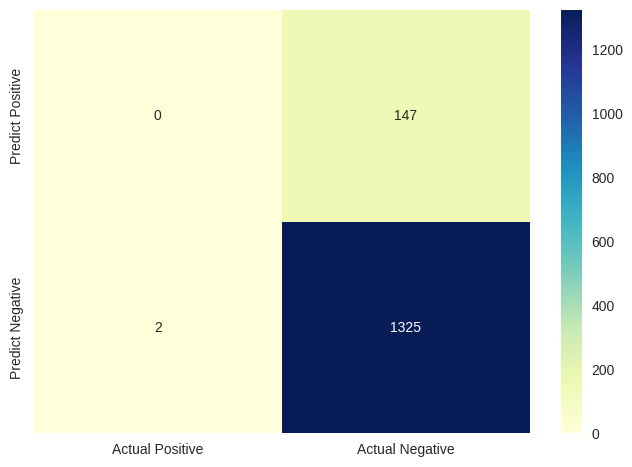

In [55]:
cm_matrix = pd.DataFrame(data=matrix, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

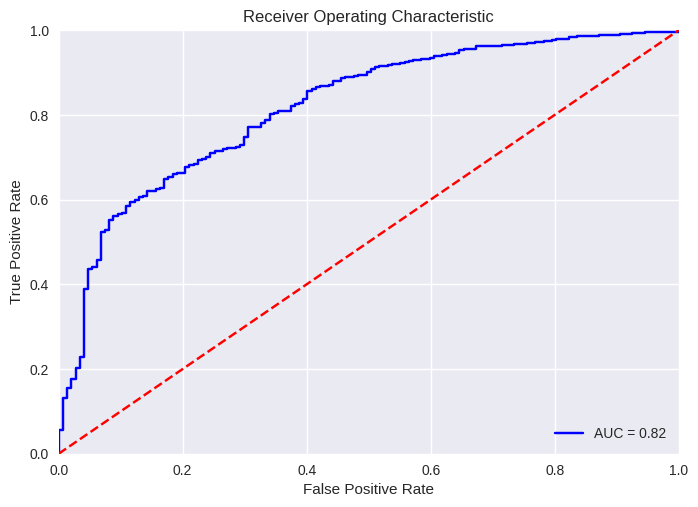

In [56]:
probs = NB.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


*  The AUC value indicates the overall performance of the MNB classifier in distinguishing between positive and negative instances based on the Receiver Operating Characteristic (ROC) curve.

*   An AUC of 0.82 suggests that the MNB classifier has a reasonably good ability to differentiate between positive and negative instances.

*   The closer the AUC value is to 1, the better the classifier is at correctly classifying positive instances as positive and negative instances as negative.



**2.**  **Logistic Regression**



In Logistic Regression, the algorithm applies a logistic function (also known as the sigmoid function) to a linear combination of the input features. The sigmoid function maps the linear combination to a value between 0 and 1, representing the probability of the instance belonging to the positive class. The model then uses a threshold (typically 0.5) to classify instances into the positive class if the predicted probability is above the threshold, and into the negative class otherwise.

In [64]:
#Logistic Regression classifier

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
%time LogReg.fit(x_train,y_train)

y_pred_train = LogReg.predict(x_train)
y_pred_test = LogReg.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 1.25 s, sys: 278 ms, total: 1.53 s
Wall time: 1.37 s

Training Accuracy score: 0.9299214888048851
Testing Accuracy score: 0.9138398914518318


In [65]:
#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred_test)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred_test, target_names=['Negative', 'Positive'])
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred_test)
print('LogReg Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  23  124]
 [   3 1324]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.88      0.16      0.27       147
    Positive       0.91      1.00      0.95      1327

    accuracy                           0.91      1474
   macro avg       0.90      0.58      0.61      1474
weighted avg       0.91      0.91      0.89      1474

LogReg Classifier Accuracy of the model: 91.38%


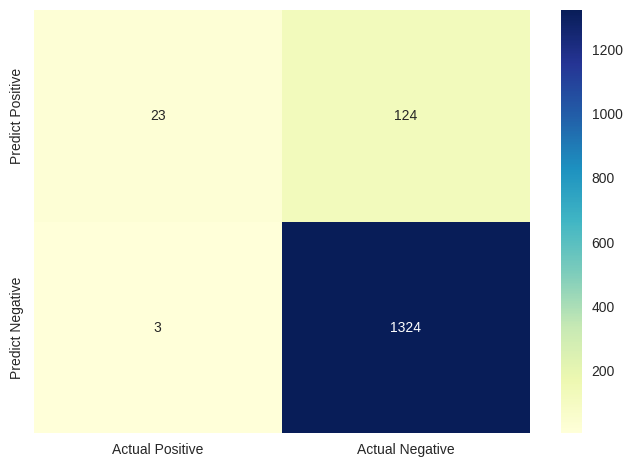

In [66]:
cm_matrix = pd.DataFrame(data=matrix, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

Based on the results for the Logistic Regression classifier, the performance of the model can be assessed as follows:

*  The model correctly predicted 23 instances as negative (true negatives).
*  The model incorrectly predicted 124 instances as positive when they were actually negative (false positives).
*  The model incorrectly predicted 3 instances as negative when they were actually positive (false negatives).
*  The model correctly predicted 1324 instances as positive (true positives).

**Precision**: The precision for the negative class is 0.88, indicating that out of all instances predicted as negative, 88% were actually negative. The precision for the positive class is 0.91, indicating that out of all instances predicted as positive, 91% were actually positive.

**Recall**: The recall (also known as sensitivity) for the negative class is 0.16, indicating that only 16% of the actual negative instances were correctly identified. The recall for the positive class is 1.00, indicating that all positive instances were correctly identified.

**F1-score:** The F1-score is the harmonic mean of precision and recall. The F1-score for the negative class is 0.27, and for the positive class, it is 0.95.

**Support:** It represents the number of instances in each class.

**The accuracy of the Logistic Regression classifier** is reported as 91.38%, indicating the overall proportion of correctly predicted instances.

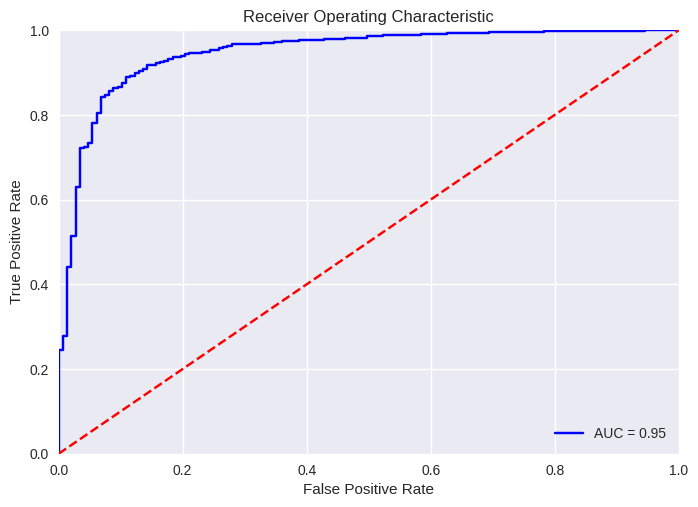

In [67]:
probs = LogReg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

an **AUC** of 0.95 for a Logistic Regression classifier suggests a very good model that can be reliably used for classification and prediction tasks.

**3. Support Vector Machines (SVM):**

SVM is a popular machine learning algorithm for text classification. It aims to find the best hyperplane that separates positive and negative sentiment in the feature space. SVM can handle high-dimensional data and has been successfully applied to sentiment analysis.

In [68]:
from sklearn.svm import LinearSVC

svc =  LinearSVC(class_weight='balanced')
%time svc.fit(x_train, y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 141 ms, sys: 1.77 ms, total: 143 ms
Wall time: 145 ms

Training Accuracy score: 0.9915673160802558
Testing Accuracy score: 0.9314789687924017


In [69]:
#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred_test)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred_test, target_names=['Negative', 'Positive'])
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred_test)
print('Support Vector Machines (SVM) Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  95   52]
 [  49 1278]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.66      0.65      0.65       147
    Positive       0.96      0.96      0.96      1327

    accuracy                           0.93      1474
   macro avg       0.81      0.80      0.81      1474
weighted avg       0.93      0.93      0.93      1474

Support Vector Machines (SVM) Classifier Accuracy of the model: 93.15%


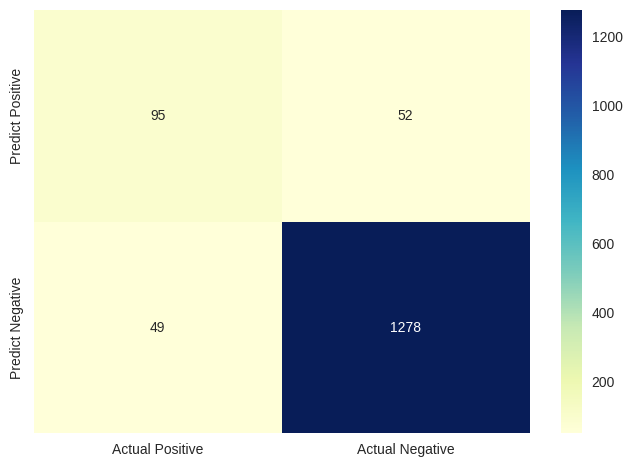

In [70]:
cm_matrix = pd.DataFrame(data=matrix, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

From the confusion matrix and the heatmap, we can infer the following:
*   ­The model correctly predicted 95 instances as negative (TN).
*   ­	The model incorrectly predicted 52 instances as positive when they were actually negative (FP).
*  ­	The model incorrectly predicted 49 instances as negative when they were actually positive (FN).
* ­	The model correctly predicted 1278 instances as positive (TP).







**Precision**: It measures the proportion of correctly predicted positive instances out of all instances predicted as positive. For the negative class, the precision is 0.66, and for the positive class, it is 0.96.

**Recall**: It measures the proportion of correctly predicted positive instances out of all actual positive instances. For the negative class, the recall is 0.65, and for the positive class, it is 0.96.

**F1-score**: It is the harmonic mean of precision and recall, providing a single metric that balances both measures. For the negative class, the F1-score is 0.65, and for the positive class, it is 0.96.

**Support**: It represents the number of instances in each class.

**The classification report:** includes the overall accuracy of the model, which is 93.15%.


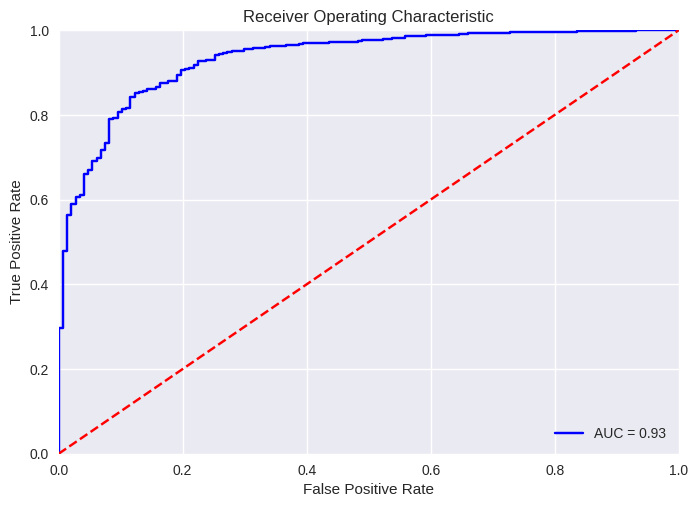

In [71]:
probs = svc._predict_proba_lr(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area Under the Curve (AUC) is 0.93 which means that the model has a high ability to distinguish between positive and negative instances: AUC values closer to 1 indicate that the model has a strong ability to correctly classify positive instances as positive and negative instances as negative.

**Comparing SVM classifier and the Logistic Regression classifier:**

the SVM classifier outperformed the Logistic Regression classifier in terms of overall accuracy, precision, recall, and F1-score. The SVM classifier showed balanced performance for both positive and negative sentiment, while the Logistic Regression classifier struggled in accurately identifying negative instances. Therefore, the SVM classifier is recommended for sentiment analysis tasks where a balanced classification of both positive and negative sentiments is essential.

As a Summary of the performance of SVM and Logistic Regression classifiers for sentiment analysis:

**SVM:**

•	Accuracy: 93.15%

•	AUC: 0.93

•	Precision, recall, and F1-score: High for both positive and negative classes

•	Balanced classification: True positives, true negatives, false positives, and false negatives are relatively balanced

**Logistic Regression:**
•	Accuracy: 91.38%

•	AUC: 0.95

•	Precision, recall, and F1-score: High for the positive class, but low for the negative class

•	Unbalanced classification: Higher number of false positives and lower number of true negatives for the negative class

**Recommendations:**

•	SVM: Preferred choice for sentiment analysis due to its balanced performance and high accuracy.

•	Logistic Regression: Requires further improvement to address its bias towards the positive class.

**Reflections:**

•	SVM: Well-balanced dataset and appropriate choice of classifier might have contributed to success.

•	Logistic Regression: Unbalanced dataset or inherent characteristics of the algorithm might explain the bias.

Overall: SVM is the preferred classifier for this specific sentiment analysis task due to its balanced performance and high accuracy.
